In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model

In [34]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [35]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

# df = df_all#.dropna()

county
state
electricity_price_transportation


In [51]:
df = df_all.loc[:, ~(df_all.columns).isin(['voting_2012_dem_percentage', 'voting_2012_gop_percentage'])]
# df =df.dropna()

In [125]:
#df_all.isnull().sum()/len(df_all)*100

In [62]:
# Investigate missing data
df_nans = df_all[pd.isnull(df_all).any(axis=1)]

In [ ]:
nans = df_nans.isna().sum()
nans.sort_values(ascending = False)

In [ ]:
df_nans = df_nans[(df_nans['daily_solar_radiation'].isnull())] 

In [84]:
counties = []
states = []
fips = []
perc_nan_of_county = []
perc_nan_landarea_of_county = []
perc_nan_landarea_of_state = []
heating_degree_days = []
cooling_design_temperature= []
cooling_degree_days=[]
earth_temperature = []
wind_speed = []
atmospheric_pressure = []
daily_solar_radiation = []
relative_humidity = []
air_temperature = []
frost_days = []
earth_temperature_amplitude = []
heating_design_temperature = []
elevation = []
lon = []
lat = []
fips_codes = []

state_grps = df_nans.groupby('state')

for s_grp in state_grps:
    county_grps = s_grp[1].groupby('county')
    for c_grp in county_grps:
        counties.append(c_grp[0])
        fips.append(len(c_grp[1].fips))
        fips_codes.append(c_grp[1].fips)
        states.append(s_grp[0])
        perc_nan_of_county.append(100*len(c_grp[1])/len(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]))
        perc_nan_landarea_of_county.append(100*sum(c_grp[1].land_area)/sum(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['land_area']) )
        perc_nan_landarea_of_state.append(100*sum(c_grp[1].land_area)/sum(df_all[(df_all.state == s_grp[0])]['land_area']) )
        heating_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_degree_days']))
        cooling_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_design_temperature']))
        cooling_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_degree_days']))        
        earth_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature'])  )           
        wind_speed.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['wind_speed']))
        atmospheric_pressure.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['atmospheric_pressure']) )
        daily_solar_radiation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['daily_solar_radiation']))
        relative_humidity.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['relative_humidity']))
        air_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['air_temperature']))
        frost_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['frost_days']))
        earth_temperature_amplitude.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature_amplitude']))
        heating_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_design_temperature']))
        elevation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['elevation']))
        lon.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lon']))
        lat.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lat']))
                   

In [85]:
no_geo_data_df = pd.DataFrame({'county':counties, 'state':states,'fips':fips,
                               'perc_nan_of_county':perc_nan_of_county, 
                               'perc_nan_landarea_of_county':perc_nan_landarea_of_county, 
                               'perc_nan_landarea_of_state':perc_nan_landarea_of_state,
                              'heating_degree_days':heating_degree_days,
                                'cooling_design_temperature':cooling_design_temperature,
                                'cooling_degree_days':cooling_degree_days,
                                'earth_temperature':earth_temperature,
                                'wind_speed':wind_speed,
                                'atmospheric_pressure':atmospheric_pressure,
                                'daily_solar_radiation':daily_solar_radiation,
                                'relative_humidity':relative_humidity,
                                'air_temperature':air_temperature,
                                'frost_days':frost_days,
                                'earth_temperature_amplitude':earth_temperature_amplitude,
                                'heating_design_temperature':heating_design_temperature,
                                'elevation':elevation,
                                'lon':lon,
                                'lat':lat
                              })

In [88]:
counties = []
states = []
fips = []
perc_nan_of_county = []
perc_nan_landarea_of_county = []
perc_nan_landarea_of_state = []
heating_degree_days = []
cooling_design_temperature= []
cooling_degree_days=[]
earth_temperature = []
wind_speed = []
atmospheric_pressure = []
daily_solar_radiation = []
relative_humidity = []
air_temperature = []
frost_days = []
earth_temperature_amplitude = []
heating_design_temperature = []
elevation = []
lon = []
lat = []
fips_codes = []

state_grps = df_nans.groupby('state')

for s_grp in state_grps:
    county_grps = s_grp[1].groupby('county')
    for c_grp in county_grps:
#         perc_nan_of_county.append(100*len(c_grp[1])/len(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]))
        if 100*sum(c_grp[1].land_area)/sum(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['land_area'])<25:
            for _fips in c_grp[1].fips:
                fips_codes.append(_fips)
                counties.append(c_grp[0])
                states.append(s_grp[0])
                heating_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_degree_days']))
                cooling_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_design_temperature']))
                cooling_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_degree_days']))        
                earth_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature'])  )           
                wind_speed.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['wind_speed']))
                atmospheric_pressure.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['atmospheric_pressure']) )
                daily_solar_radiation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['daily_solar_radiation']))
                relative_humidity.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['relative_humidity']))
                air_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['air_temperature']))
                frost_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['frost_days']))
                earth_temperature_amplitude.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature_amplitude']))
                heating_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_design_temperature']))
                elevation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['elevation']))
                lon.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lon']))
                lat.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lat']))
                   

In [89]:
no_geo_data_df2 = pd.DataFrame({'county':counties, 'state':states,'fips':fips_codes,
                                'heating_degree_days':heating_degree_days,
                                'cooling_design_temperature':cooling_design_temperature,
                                'cooling_degree_days':cooling_degree_days,
                                'earth_temperature':earth_temperature,
                                'wind_speed':wind_speed,
                                'atmospheric_pressure':atmospheric_pressure,
                                'daily_solar_radiation':daily_solar_radiation,
                                'relative_humidity':relative_humidity,
                                'air_temperature':air_temperature,
                                'frost_days':frost_days,
                                'earth_temperature_amplitude':earth_temperature_amplitude,
                                'heating_design_temperature':heating_design_temperature,
                                'elevation':elevation,
                                'lon':lon,
                                'lat':lat
                              })

In [86]:
impute_loc = no_geo_data_df[(no_geo_data_df.perc_nan_landarea_of_county<25) ]

In [90]:
grps = no_geo_data_df2.groupby('state')

for grp in grps:
    print(grp[0], len(grp[1]), 100*len(grp[1])/len(df_all[df_all.state == grp[0]]) )

al 1 0.0846740050804403
ar 50 7.288629737609329
ca 14 0.17378351539225423
ct 3 0.36014405762304924
dc 21 11.731843575418994
de 18 8.256880733944953
fl 33 0.7773851590106007
ga 3 0.15236160487557135
ia 71 8.606060606060606
il 2 0.06404098623118797
in 3 0.1985440105890139
ks 83 10.779220779220779
ky 133 11.928251121076233
la 139 12.10801393728223
ma 180 12.178619756427604
md 274 19.48790896159317
me 68 18.99441340782123
mi 138 4.905794525417703
mn 87 6.502242152466367
mo 103 7.394113424264178
ms 62 9.337349397590362
mt 26 9.59409594095941
nc 262 11.93621867881549
nd 15 7.317073170731708
ne 20 3.7593984962406015
nh 36 12.203389830508474
nj 212 10.54726368159204
nv 131 19.068413391557495
ny 12 0.24400162667751119
oh 404 13.685636856368564
ok 105 10.038240917782026
or 94 11.270983213429256
pa 401 12.461155997513984
ri 37 15.163934426229508
sc 116 10.516772438803264
sd 16 7.207207207207207
tn 127 8.483633934535739
tx 469 8.907882241215574
ut 67 11.394557823129253
va 182 9.543786051389617
vt 

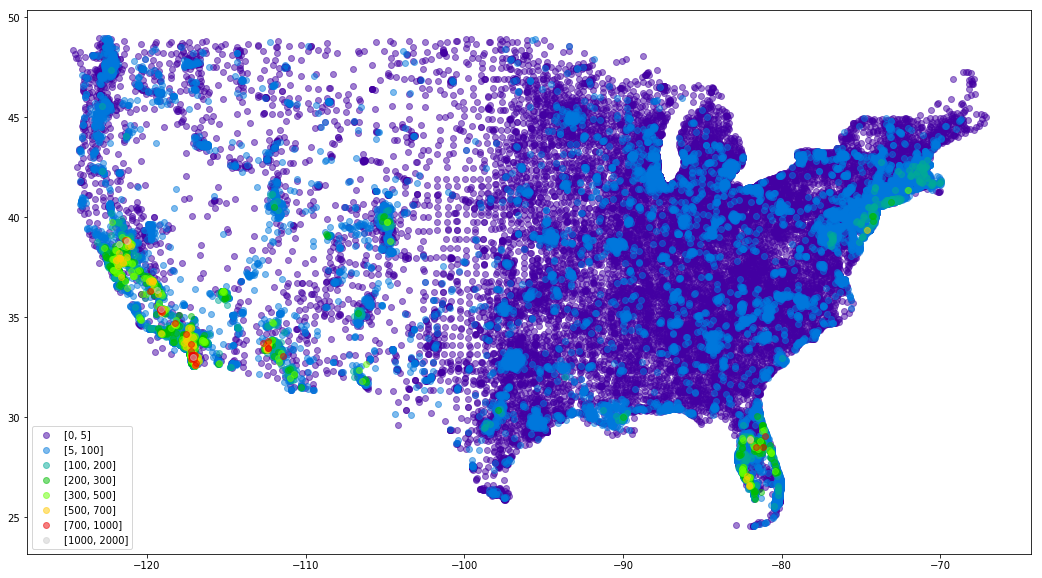

In [52]:
# 4.) Analyze target variable: map, ordered scatter plot
target = 'solar_system_count_residential'

cmap = plt.cm.get_cmap('nipy_spectral')
intervals = [[0,5],[5,100], [100, 200],[200,300],[300, 500], [500, 700], [700, 1000], [1000, 2000] ]

fig, ax = plt.subplots(figsize = [18,10])
for ct_ind, ct in enumerate(intervals):
    rgba = cmap((ct_ind +1)*1/len(intervals) )
    plt.scatter(df[(df[target]>=ct[0]) &(df[target]<ct[1])].lon, df[(df[target]>=ct[0]) &(df[target]<ct[1])].lat,c = rgba, alpha = .5, label = ct)

plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')

In [164]:
min(df.house_val_rel_to_med_income), max(df.house_val_rel_to_med_income)

(0.2574341546304163, 80.74613428075416)

In [39]:
# Create some variables
df['income_per_area_residential'] = df['average_household_income']*df['household_count'].div(df.land_area)
df['household_density'] = df['household_count'].div(df.land_area)
df['education_higher_ed'] = (df['education_bachelor'] + df['education_doctoral'] + df['education_master'] + df['education_professional_school'])
df['house_val_rel_to_med_income'] = df['housing_unit_median_value'].div(df.median_household_income)

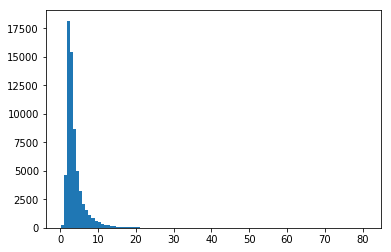

In [40]:
n, bins, patches = plt.hist(df.house_val_rel_to_med_income, 100)

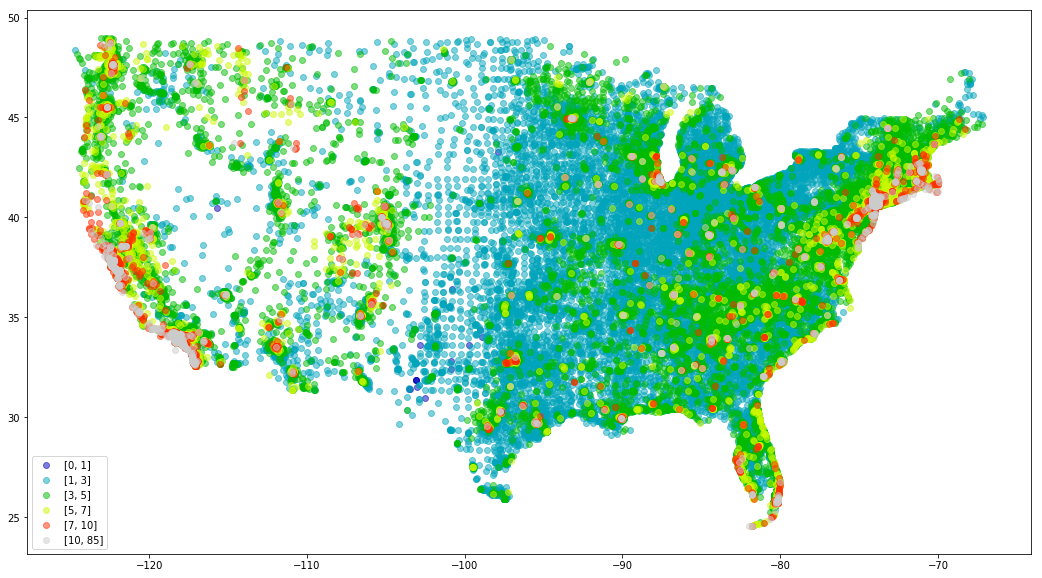

In [41]:
# 4.) Analyze target variable: map, ordered scatter plot
target = 'solar_system_count_residential'

cmap = plt.cm.get_cmap('nipy_spectral')
intervals = [[0,1],[1,3], [3, 5],[5,7],[7, 10], [10, 85]]

fig, ax = plt.subplots(figsize = [18,10])
for ct_ind, ct in enumerate(intervals):
    rgba = cmap((ct_ind +1)*1/len(intervals) )
    plt.scatter(df[(df['house_val_rel_to_med_income']>=ct[0]) &(df['house_val_rel_to_med_income']<ct[1])].lon, df[(df['house_val_rel_to_med_income']>=ct[0]) &(df['house_val_rel_to_med_income']<ct[1])].lat,c = rgba, alpha = .5, label = ct)

plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')

In [42]:
print('Number of residential solar systems identified by image analysis:', sum(df[target]))
print('Number of census tracts without any identified solar systems:', len(df[df[target]>0]))
print('Greatest number of solar systems identified in a single tract:', max(df[target]), '(',df[df[target] == max(df[target])]['county'],',',df[df[target] == max(df[target])]['state'] ,')')
print('Percentage of households with solar systems:', 100*sum(df[target])/sum(df['household_count']))

Number of residential solar systems identified by image analysis: 1188157.0
Number of census tracts without any identified solar systems: 47592
Greatest number of solar systems identified in a single tract: 1404.0 ( 8573    San Diego County
Name: county, dtype: object , 8573    ca
Name: state, dtype: object )
Percentage of households with solar systems: 1.1395038764674017


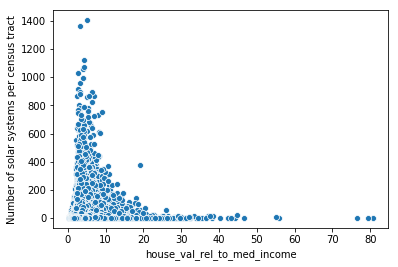

In [169]:
ax = sns.scatterplot(x = df.house_val_rel_to_med_income, y = df[target].sort_values())
ax.set_ylabel('Number of solar systems per census tract')

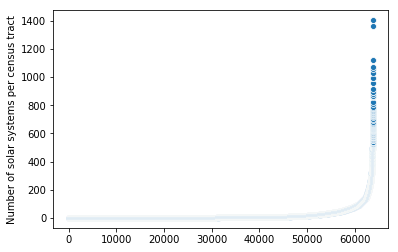

In [73]:
ax = sns.scatterplot(x = [ik for ik in range(len(df))], y = df[target].sort_values())
ax.set_ylabel('Number of solar systems per census tract')

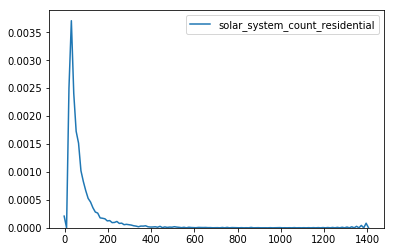

In [76]:
sns.kdeplot(df[target])

In [43]:
# 1.) pull out columns that contain strings, solar variables (except target), nonresidential variables

misc = ['Unnamed: 0','fips', 'county', 'state']
solar = ['total_panel_area',  'total_panel_area_residential', 'total_panel_area_nonresidential',  
                   'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
                'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 
                   'solar_system_count','solar_system_count_nonresidential']
non_residential = ['electricity_price_transportation','incentive_count_nonresidential',
                   'electricity_consume_commercial','electricity_price_overall', 'electricity_consume_industrial', 
                   'electricity_consume_total','electricity_price_industrial','electricity_price_commercial']

df = df.loc[:, ~(df.columns).isin(misc + solar + non_residential)]


In [ ]:
# Analyze distributions of key variables

In [ ]:
# .) Try to characterize relationships between logically related variables 

In [183]:
X = df#.loc[:, ~(df.columns).isin([target])]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [142]:
variances = X_train.var()
var_df = pd.DataFrame({'cols': X_train.columns, 'variances': variances})
var_df.sort_values('variances', ascending=False)

In [150]:
small_var = []
for var_ind, var in enumerate(variances):
    if var<10:
        small_var.append(variances.index[var_ind])


In [110]:
# 2.) Next, scale data

In [44]:
def split_scale_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    sclr = StandardScaler()
    sclr.fit(X_train[X_train.columns])

    X_train_scaled = pd.DataFrame(sclr.transform(X_train[X_train.columns]), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(sclr.transform(X_test[X_test.columns]), columns = X_test.columns)

    y_train_scaled = X_train_scaled[target]
    X_train_scaled = X_train_scaled.loc[:, ~(X_train_scaled.columns).isin([target])]

    y_test_scaled = X_test_scaled[target]
    X_test_scaled = X_test_scaled.loc[:, ~(X_test_scaled.columns).isin([target])]
    
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  


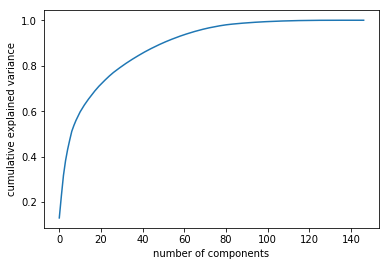

In [45]:
# 3.) Run PCA and look at which features contribute most variance

X = df#.loc[:, ~(df.columns).isin([target])]
y = df[target]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = split_scale_data(X, y)

pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [46]:
pca = PCA(n_components=120)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
labels = ['PC-'+str(ik) for ik in range(100)]
pca_components = pd.DataFrame(pca.components_,columns=X_train_scaled.columns,index = labels)

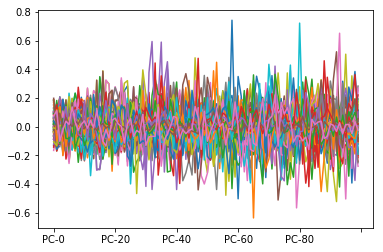

In [177]:
for col in pca_components.columns:
    pca_components[col].plot()

In [96]:
edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white', 'race_indian_alaska_rate','race_two_more_rate']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar', 'heating_fuel_solar_rate']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate','race_indian_alaska','race_two_more']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate', 'heating_fuel_solar']



In [ ]:
# 5.) Consider model options: Linear Regression, Random Forest Regression, SVM-R, Gradient Boosting Regression

In [47]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_lin_reg = lin_reg.predict(pca.transform(X_test_scaled))
print('lin_reg score:', lin_reg.score(pca.transform(X_test_scaled), y_test_scaled))

lasso = linear_model.Lasso()
lasso.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_lasso_reg = lasso.predict(pca.transform(X_test_scaled))
print('lasso score:', lasso.score(pca.transform(X_test_scaled), y_test_scaled))

ridge = linear_model.Ridge()
ridge.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_ridge_reg = ridge.predict(pca.transform(X_test_scaled))
print('ridge score:', ridge.score(pca.transform(X_test_scaled), y_test_scaled))

lin_reg score: 0.456880545794
lasso score: 0.0497594327352
ridge score: 0.456885765306


In [99]:
from sklearn.svm import SVR

params = {'kernel' :'rbf'}
svr = SVR(**params)
svr.fit(pca.transform(X_train_scaled), y_train_scaled)

preds = svr.predict(pca.transform(X_test_scaled))
svr.score(pca.transform(X_test_scaled), y_test_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.74098671220007795

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.76257850059570331

In [22]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.60483639010279622

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.76257850059570331

In [154]:
X2 = df.loc[:, ~(df.columns).isin([target])]
y2 = df[target]

X_train, X_test, y_train, y_test= train_test_split(X2, y2)

clf2 = ensemble.GradientBoostingRegressor(**params)
clf2.fit(X_train, y_train)
preds_clf2 = clf2.predict(X_test)
clf2.score(X_test, y_test)


0.73025680430040729

In [156]:
cross_val_score(clf2, X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.72585088,  0.73445397,  0.75743734])

In [103]:
rfr = ensemble.RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
rfr.fit(pca.transform(X_train_scaled), y_train_scaled)
print(cross_val_score(rfr, pca.transform(X_train_scaled), y_train_scaled))

preds_rfr = rfr.predict(pca.transform(X_test_scaled))
rfr.score(pca.transform(X_test_scaled), y_test_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[ 0.56471359  0.58508041  0.56849524]


0.5962793518956

In [ ]:
# 6.) Optimize models with GridSearchCV

In [50]:
params = {'loss': ['ls', 'lad', 'huber'], 
         'learning_rate': [.01, .1] ,
         'subsample': [.6, 1],
         'criterion': ['friedman_mse', 'mae'],
         'max_depth': [2,3,6],
         'n_estimators':[100, 400]
         }

import time
start = time.time()
gbr = ensemble.GradientBoostingRegressor(**params)
clf = GridSearchCV(gbr, params, cv = 5, n_jobs= -1)
clf.fit(pca.transform(X_train_scaled), y_train_scaled)
clf.score(pca.transform(X_test_scaled), y_test_scaled)
end = time.time()
total_time = end-start
print('total time:', total_time)

KeyboardInterrupt: 

In [ ]:
# 7.) Consider different metrics 

In [ ]:
# 8.) Present final model with discussion of error